# Иерархическая кластеризация при помощи seaborn

Обучение без учителя

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Scripts\ML_engeneer\Clustering\Data\cluster_mpg.csv")

Анализ и обработка данных

In [3]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

Создадим дамми переменные без удаления дублирующих данных (drop_first), но удалим колонку name

In [6]:
df_w_dummies = pd.get_dummies(df.drop('name', axis=1))

In [7]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,False,False,True
388,44.0,4,97.0,52.0,2130,24.6,82,True,False,False
389,32.0,4,135.0,84.0,2295,11.6,82,False,False,True
390,28.0,4,120.0,79.0,2625,18.6,82,False,False,True


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [11]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

Наши данные преобразовались в массив numpyю Преобразуем данные обратно в датафрейм, чтобы видеть названия колонок.

In [12]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)

In [13]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<Axes: >

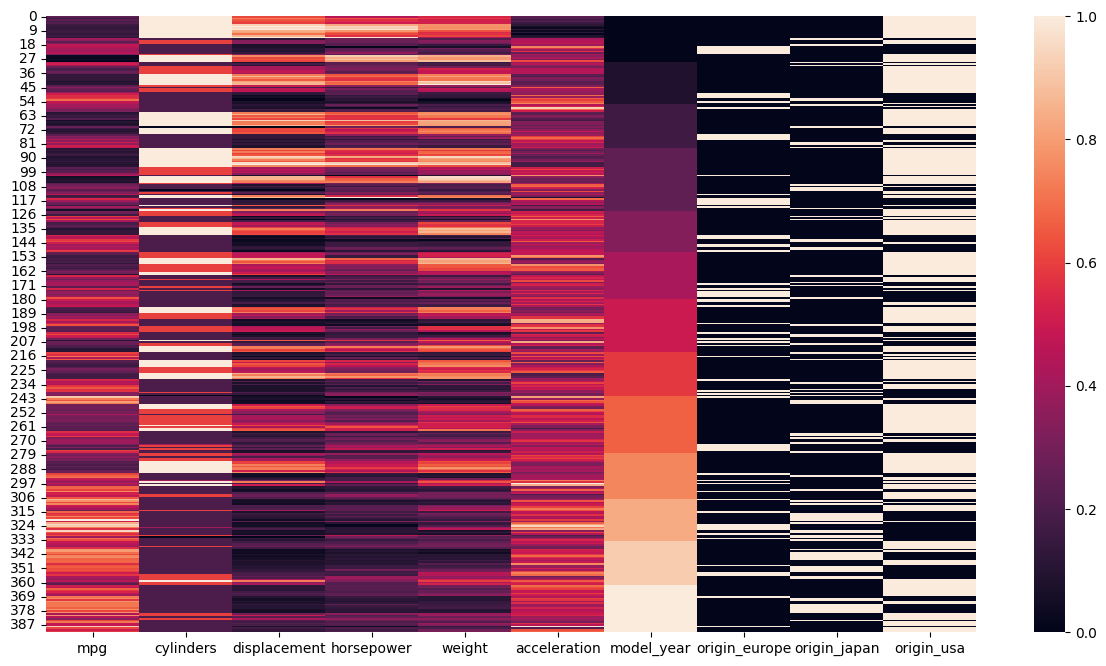

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(scaled_df)

Справа мы видим белые и черные кластеры. Это дамми-переменные со значениями только 0 и 1. По колонке model_year мы видим ровный градиент - все данные были отсортированы по этой колонке. Во всех остальных колонках мы видим различные значения в диапазоне от нуля до еденицы.

In [15]:
len(df)

392

<Figure size 1500x800 with 0 Axes>

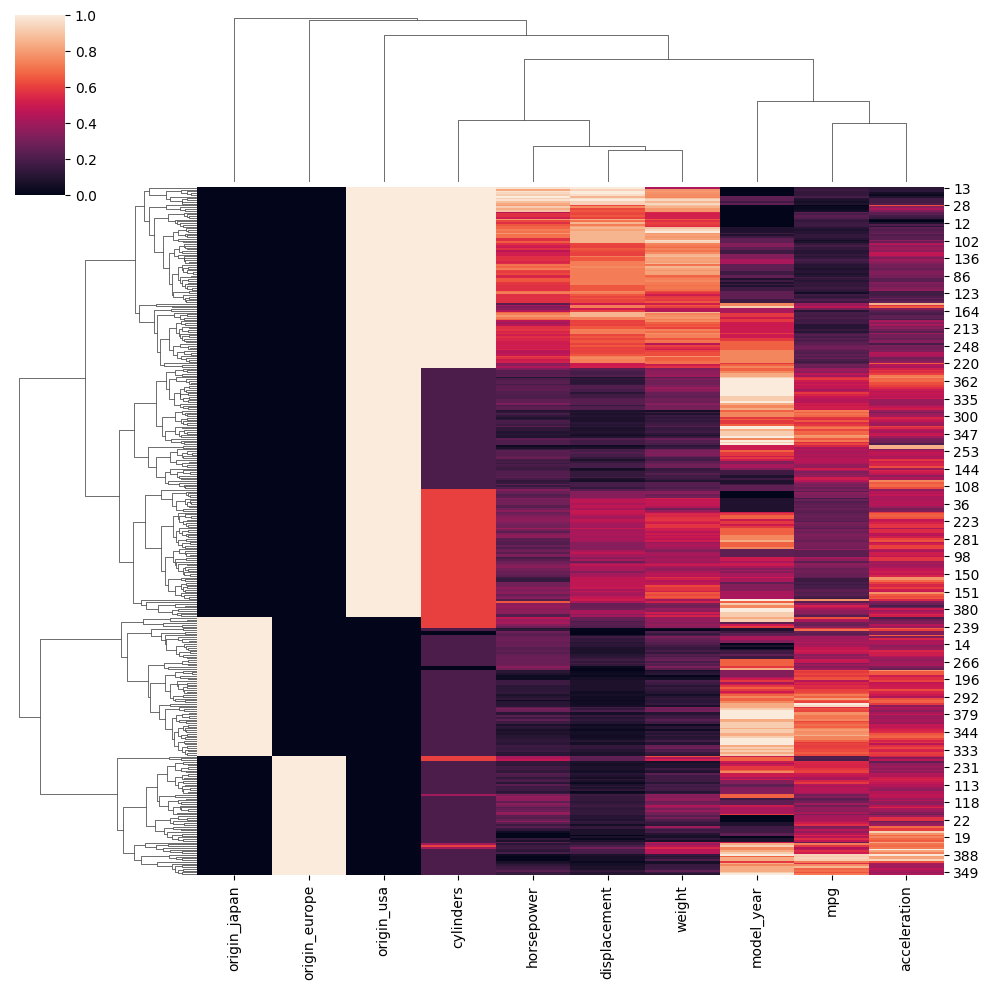

In [16]:
plt.figure(figsize=(15, 8))
sns.clustermap(scaled_df)

По умолчанияю seaborn строит кластеризацию как по строкам, так и по колонкам. В этом графике каждая строка это отдельный автомобиль и мы хотяим сгруппировать вместе похожие автомобили. Поэтому нам нужно сгруппировать только строки. Отключим кластеризацию колонок. Она нам может помочь понять, какие признаки похожи друг на друга, но для этого мы можем вычислить корреляцию между признаками.
Отключить кластеризацию по строкам = row_cluster=False
отключить кластеризацию по колонкам = 

<Figure size 1500x800 with 0 Axes>

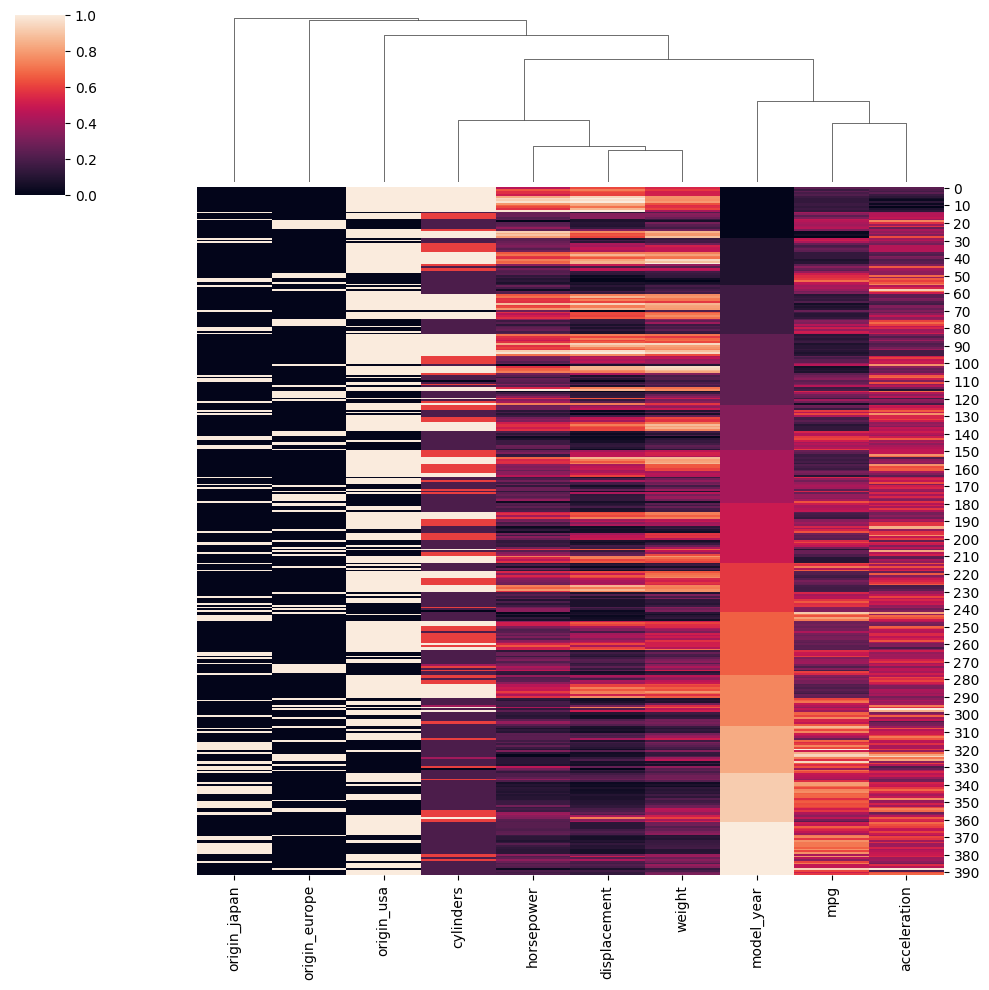

In [17]:
# Отключим строки и нарисуем кластеризацию по колонкам
plt.figure(figsize=(15, 8))
sns.clustermap(scaled_df, row_cluster=False)

Дамми переменные объеденяются в кластеры в самую последнюю очередь, так как они больше всего отличаются от других признаков.

Посмотрим какие признаки больше всего похожи друг на друга. Для этого посмотри какие вертикальные линии наиболее короткие (сверху графика). Высота линии отвечает здесь за расстояния между точками или кластерами. Мы можем видеть два признака - weight (масса) и displacement (объем двигателя). Справа мы видим два относительно похожих признака - mpg и acceleration - их вертикальные линии более высокие. Эти признаки менее похожи, чем предыдущая пара. И так далее. 

In [18]:
scaled_df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
origin_europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
origin_japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
origin_usa,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


<Axes: >

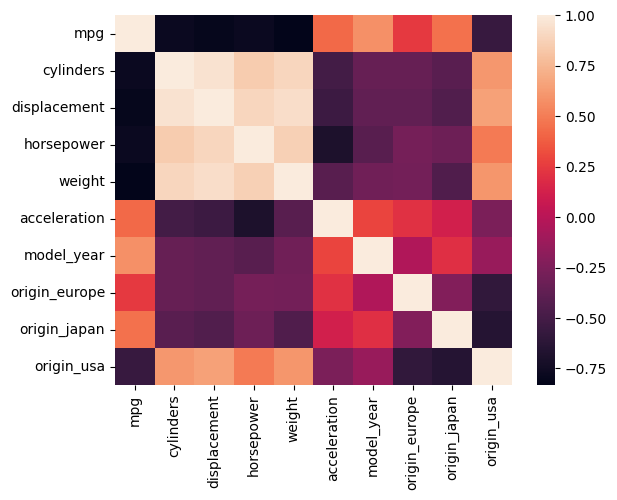

In [19]:
sns.heatmap(scaled_df.corr(numeric_only=True))

<Figure size 1500x800 with 0 Axes>

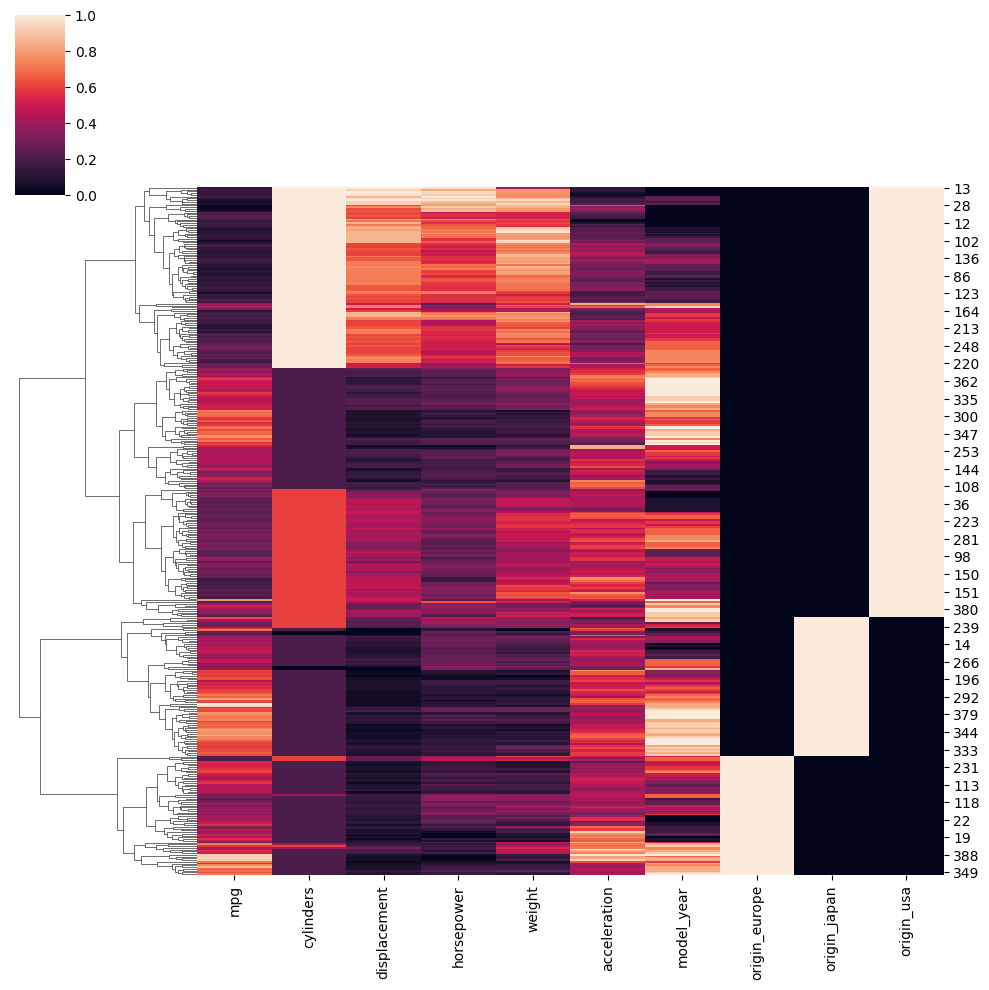

In [20]:
# Отключим колонки и нарисуем кластеризацию по строкам, ведь она нам и нужна.
plt.figure(figsize=(15, 8))
sns.clustermap(scaled_df, col_cluster=False)

тут мы видим разбиения на большие куски. Справа белый самый большой набор автомобилей для orign_USA. Внутри orign_USA, справа, мы видим кластер по колонке cilinders, разбитый на три части (белый, фиолетовый и красный). Это категориальная колонка со значениями 2, 4, 6 и 8. Непрерывняе значения выполняются в градиенте (регрессия). На таком графике мы можем видеть, какие признаки участвуют при построении кластеров. 

Такие графики работают только на маленьких датасетах и по ним нельзя определить и показать нам номер кластера для отдельных строк.

# Иерархическая кластеризация при помощи sklearn - AgglomerativeClustering

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
model_4 = AgglomerativeClustering(n_clusters=4)

In [23]:
# scaled_df

Получим номера кластеров

In [24]:
cluster_labels = model_4.fit_predict(scaled_df)

In [25]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

Мы указали n_cluster=4, поэтому получили 4 кластера от 0 до 3. 

Нарисуем график данных относительно признаков

<Axes: xlabel='mpg', ylabel='weight'>

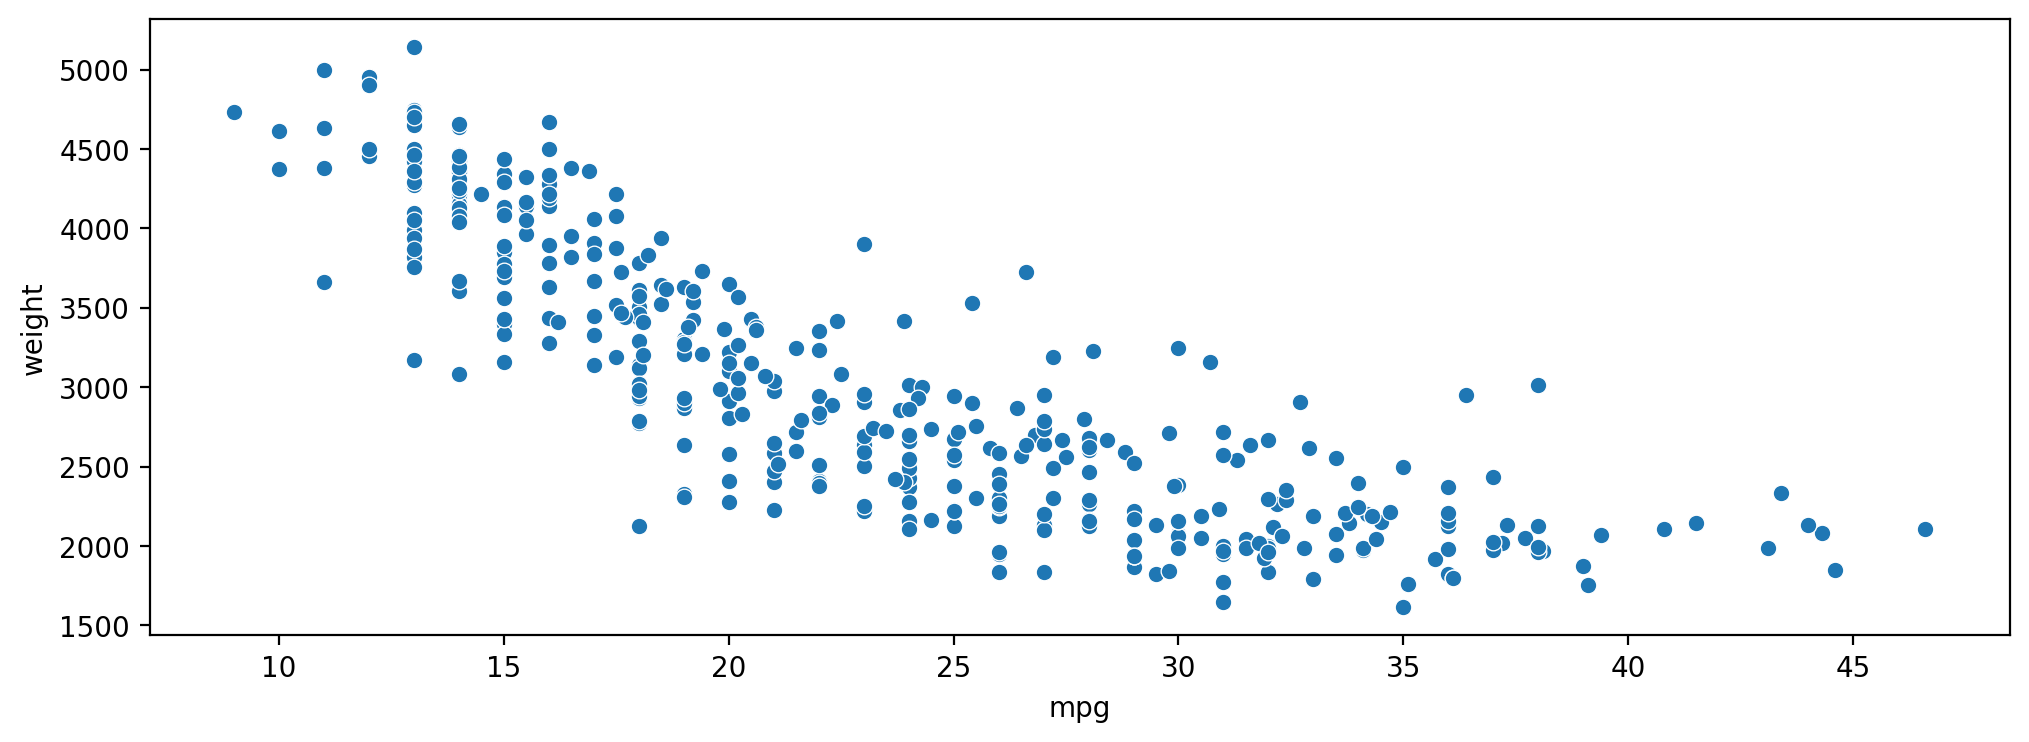

In [26]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight')

При увеличении веса автомобиля количество миль на галлон уменьшается. 

<Axes: xlabel='mpg', ylabel='weight'>

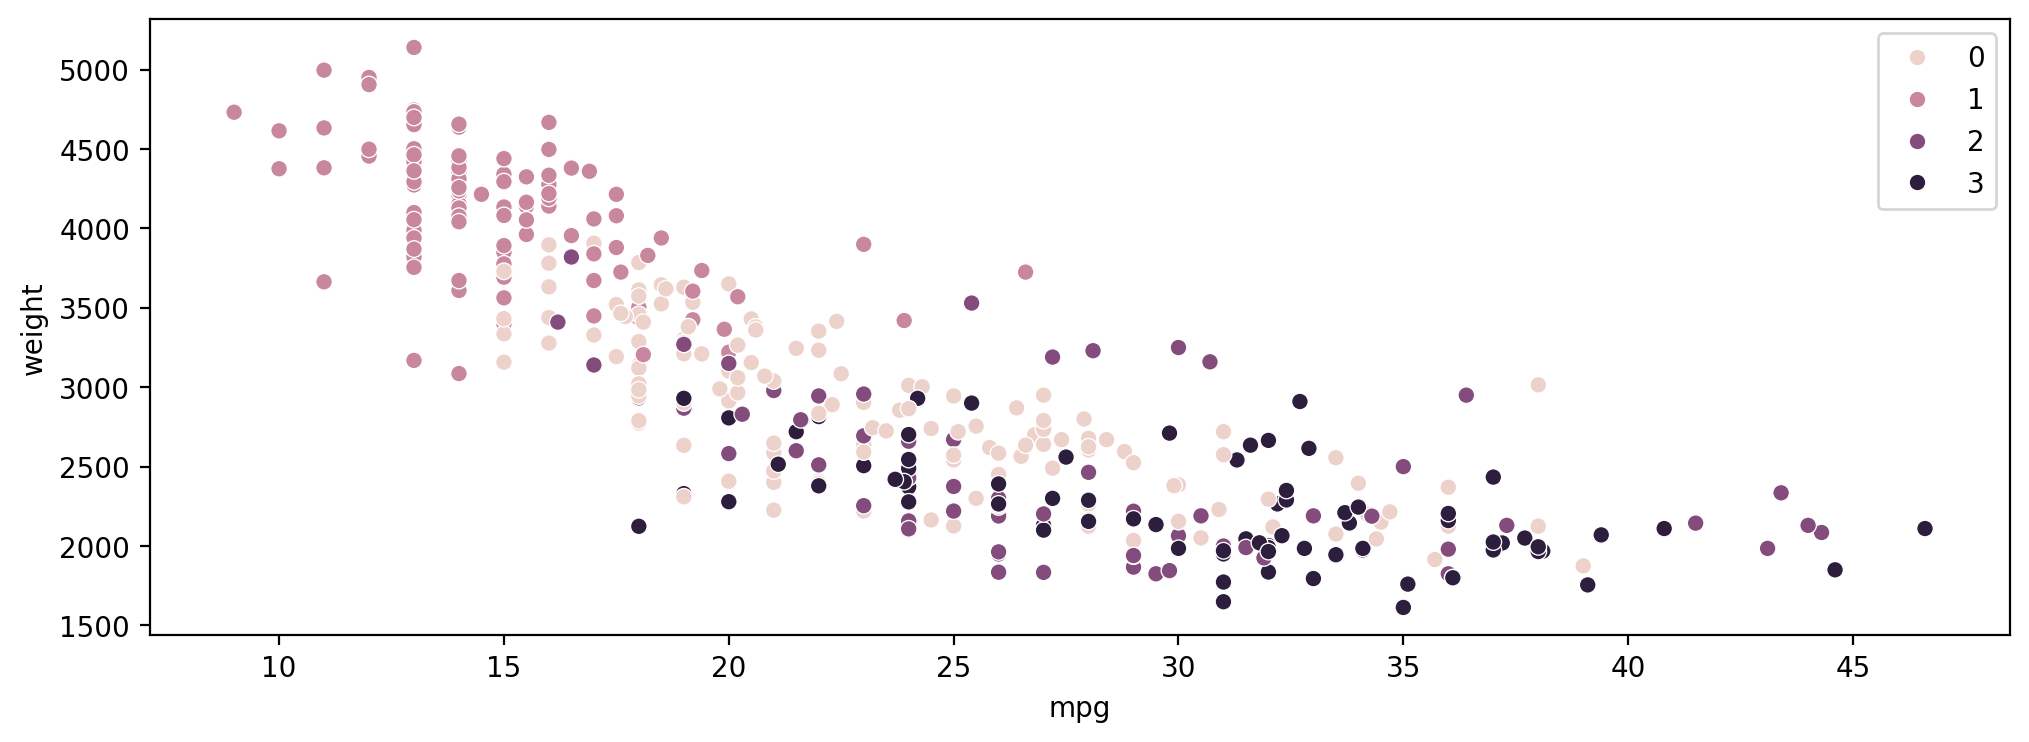

In [27]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue=cluster_labels)

На этом графике мы видим некоторый набор точек в левой верхней части, которые имеют похожие кластеры. Это тяжелые автомобили с низкими значениями miles_per_gallon. Более темные цвета с кластером 3 - более легкие автомобили с более высокими значениями miles_per_gallon. 

<Axes: xlabel='mpg', ylabel='horsepower'>

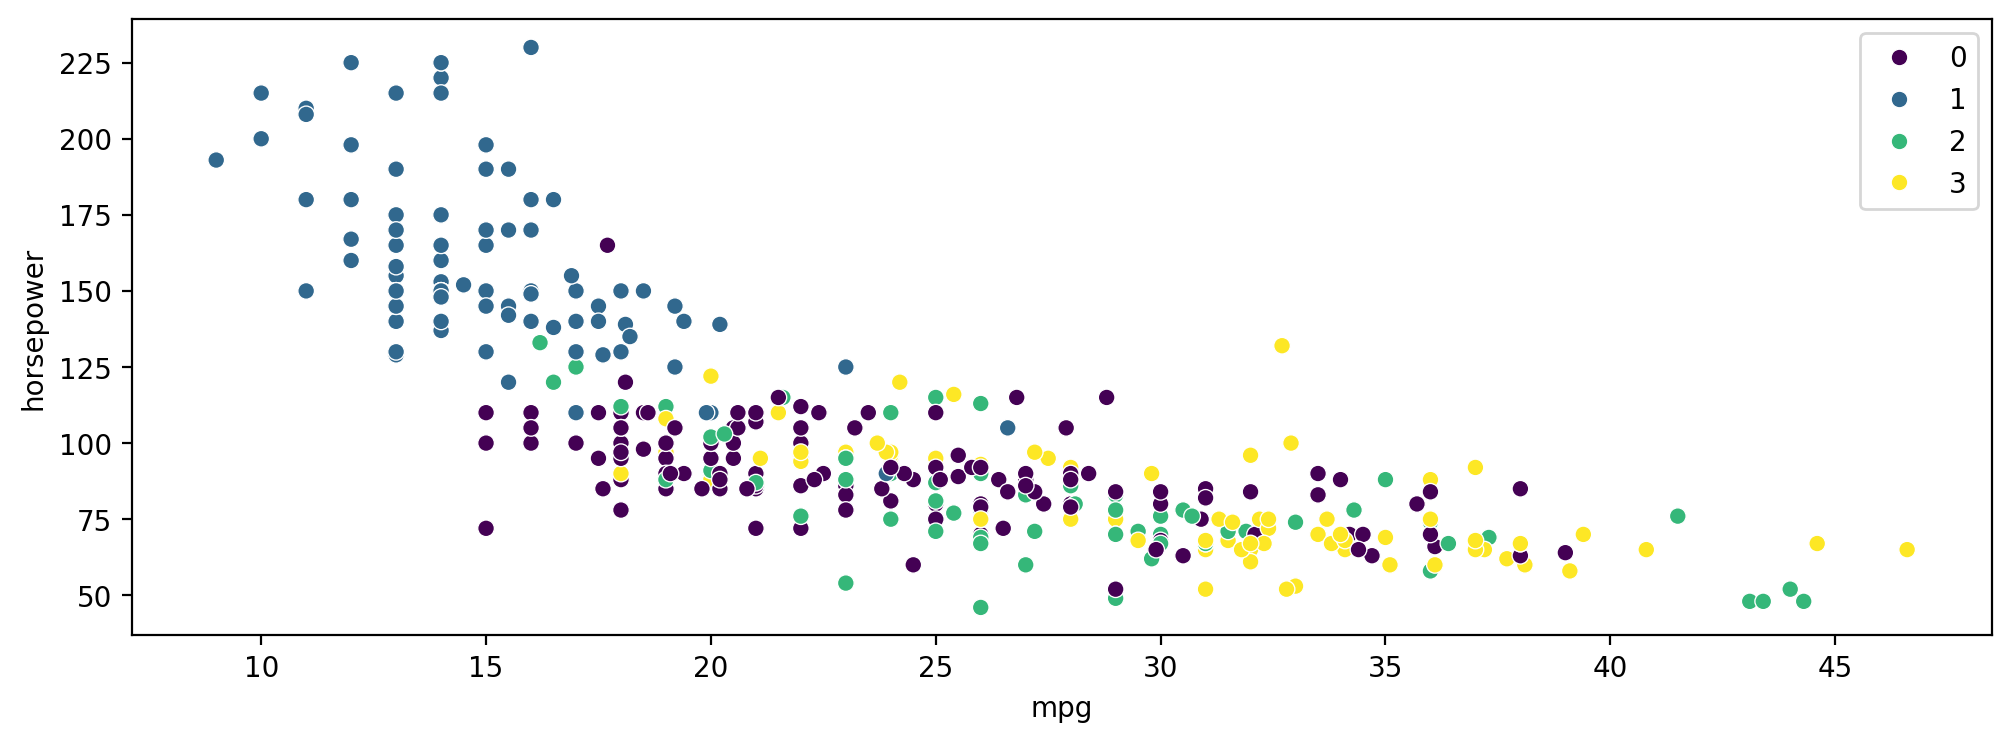

In [28]:
# Посмотрим атрибус horse power
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels, palette='viridis')

Здесь мы видим синие точки слева сверху - это большое количество лошадиных сил и небольшое количество miles_per_gallon. 

Посмотрим, как будет выглядель 3 кластера

In [29]:
model_3 = AgglomerativeClustering(n_clusters=3)
cluster_labels = model_3.fit_predict(scaled_df)

<Axes: xlabel='mpg', ylabel='weight'>

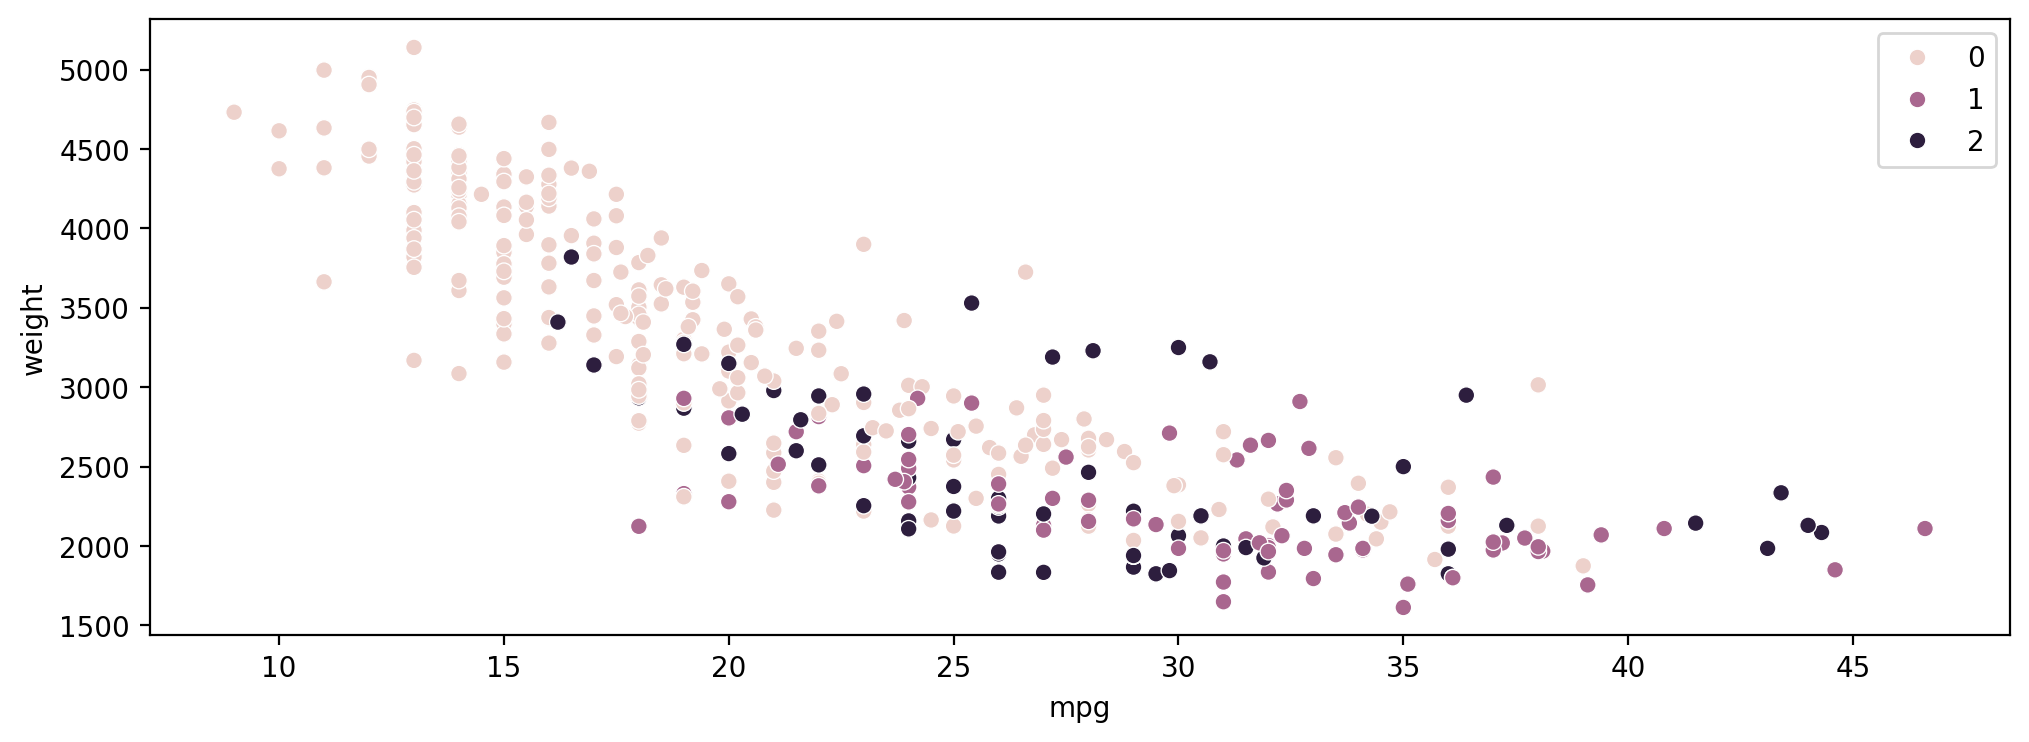

In [30]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue=cluster_labels)

<Axes: xlabel='mpg', ylabel='horsepower'>

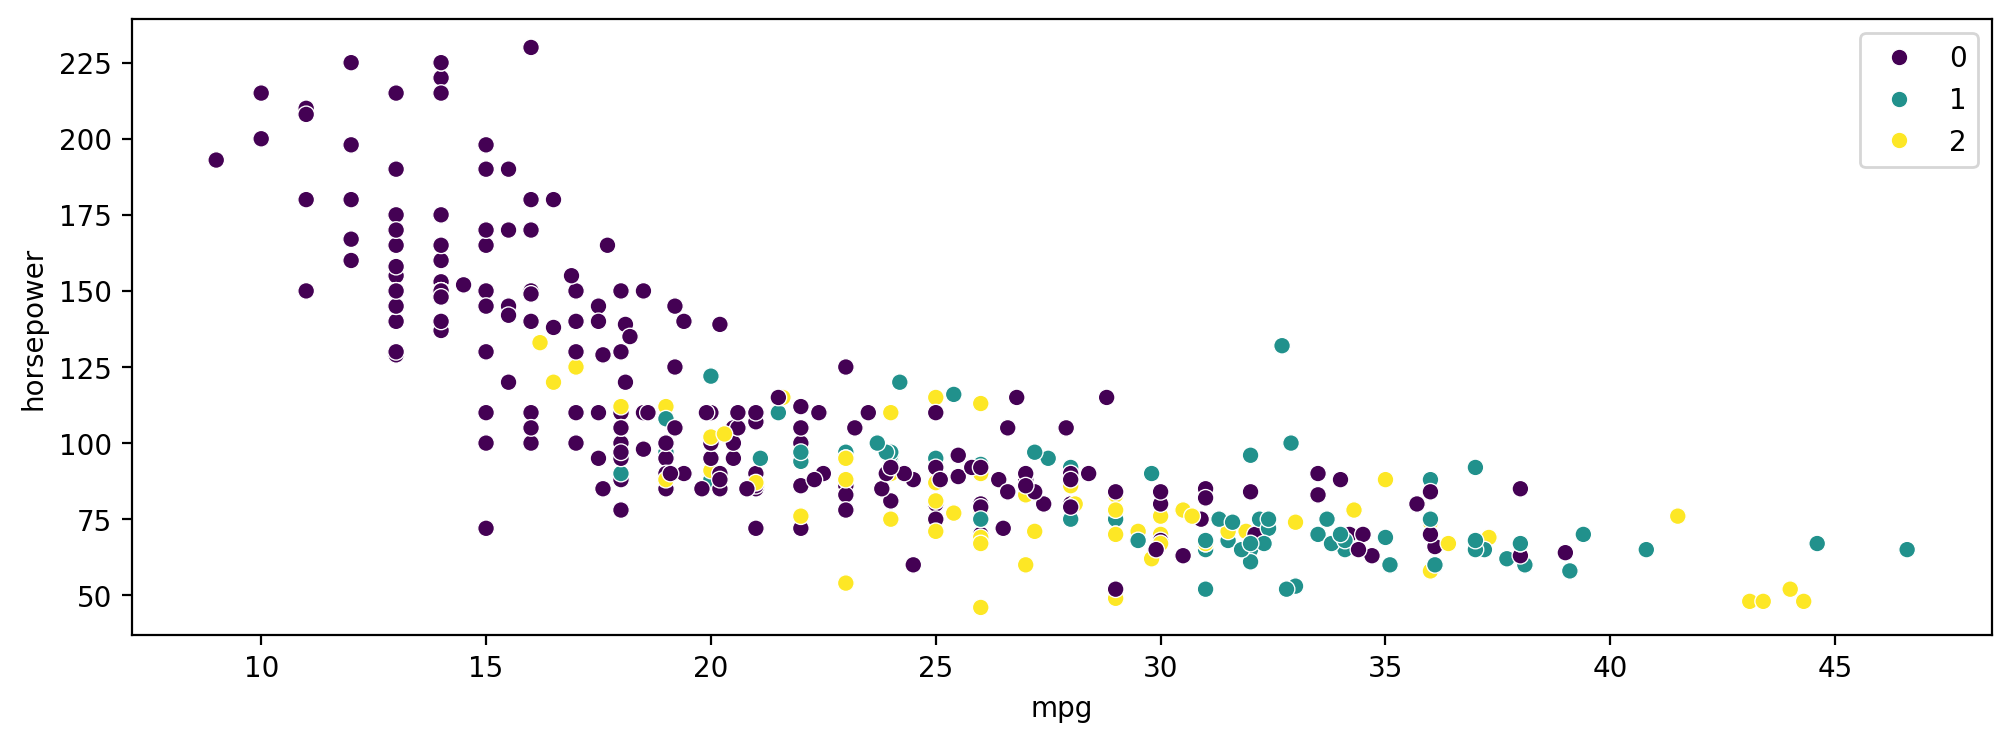

In [31]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels, palette='viridis')

Наш предыдущий кластер исчез и распределение стало более плавным вдоль точек оси х

# Посмотрим на дендрограммы и выберем с их помощью оптимальное количество кластеров

В AgglomerativeClustering есть параметр 'affinity'. По умолчанию это Евклидова метрика и рекомендовано оставить ее. 

Евклидово расстояние считается по формуле: d(p,q)^2 = (q1 - p1)^2 + (q2 - p2)^2. 

Ранее мы использвали масштабирование MinMaxScaler и наши числа меняются в диапазоне от 0 до 1. Каждая из слагаемых в этой сумме (по формуле) не может быть больше 1. Максимальное расстояние по Евклиду - это, когда одна координата = 1, а другая = 0. Общее расстояние между координатами точек не может быть больше, чем количество таких слагаемых, т.е. квадратный корень от количества признаков - sqrt(N_features). Количество признаков - это len(scaled_df.columns)

In [32]:
len(scaled_df.columns)

10

In [33]:
np.sqrt(10)

np.float64(3.1622776601683795)

В AgglomerativeClustering есть параметр 'distance_threshold'. По умолчанию этот параметр = None, так как по умолчанию стоит 2 кластера. При этом, для количества кластеров его нужно установить в значение None, если мы работаем с параметром 'distance_threshold'/

distance_threshold - это пороговое значение для расстояния linkage_distance, выше которого кластеры уже не будут объединяться между собой. 

**Создадим новый экземпляр модели**

In [34]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [35]:
cluster_labels = model.fit_predict(scaled_df)

In [36]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

При from scipy.cluster.hierarchy import linkage = linkage_matrix = linkage()

In [37]:
linkage_matrix = hierarchy.linkage(model.children_)

In [38]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

Мы получили матрицу. 
Мы видим пару из двух кластеров с номерами 67. и 161. Далее, в третьей колонке, указано расстояние между двумя кластерами 1.41421356. В четвертой колонке указано количество точек в этих двух кластерах = 2. 

На самой вершине дендрограммы мы видим большое количество точек 389, 390, 391. А в самом низу их по 2. всего точек 391. 

Нарисуем график дендрограмму.

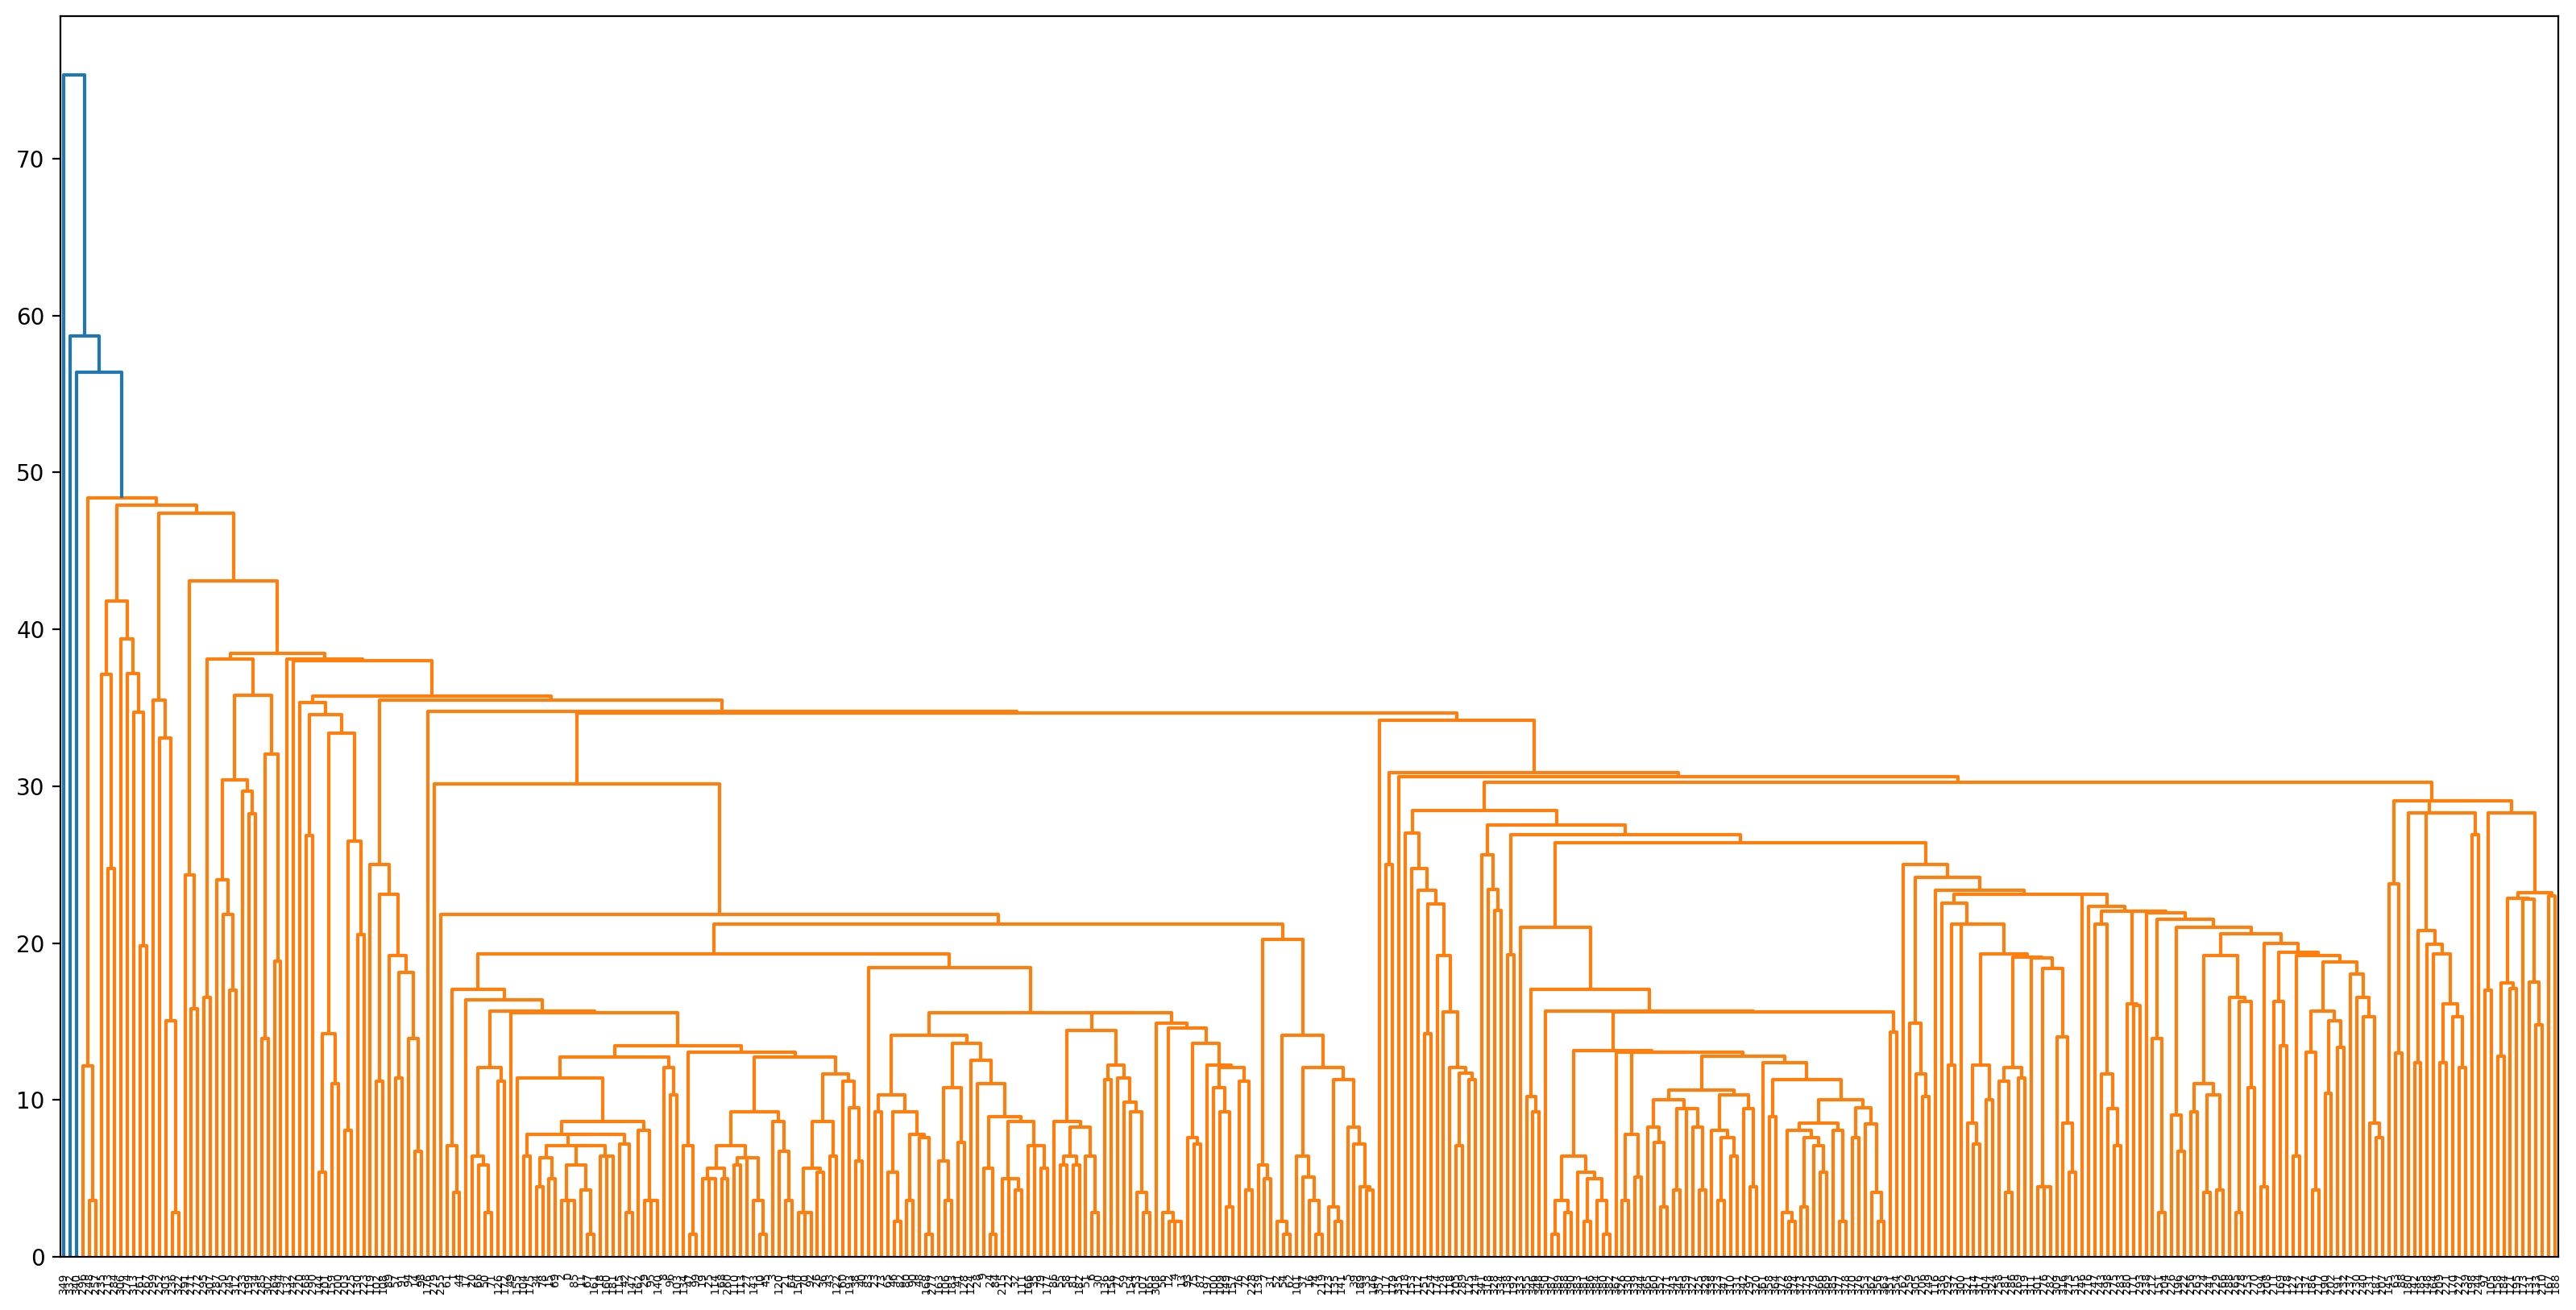

In [39]:
plt.figure(figsize=(20, 10), dpi=200)
dendro = dendrogram(linkage_matrix)

По оси Х указаны различные номера автомобилей, которые соответствуют номерам кластеров (при distance_threshold=0 каждая точка = кластер), а по оси у - расстояние между двумя кластерами.

В самом низу располагаются пары кластеров. А в самом верху графика мы видим более крупные кластеры. Самый крупный кластер имеет высоту 75 (слева у оси у).

Глядя на этот график мы можем сказать, что в какой-то момент мы можем остановиться в построении иерархии. 

В AgglomerativeClustering есть параметр 'truncate_mode'. Они имеет два значения - lastp (объединение только р-кластеров и далее стоп) и level (мы берем толльк з-уровней и далее стоп). И мы должны указать значение р=число)

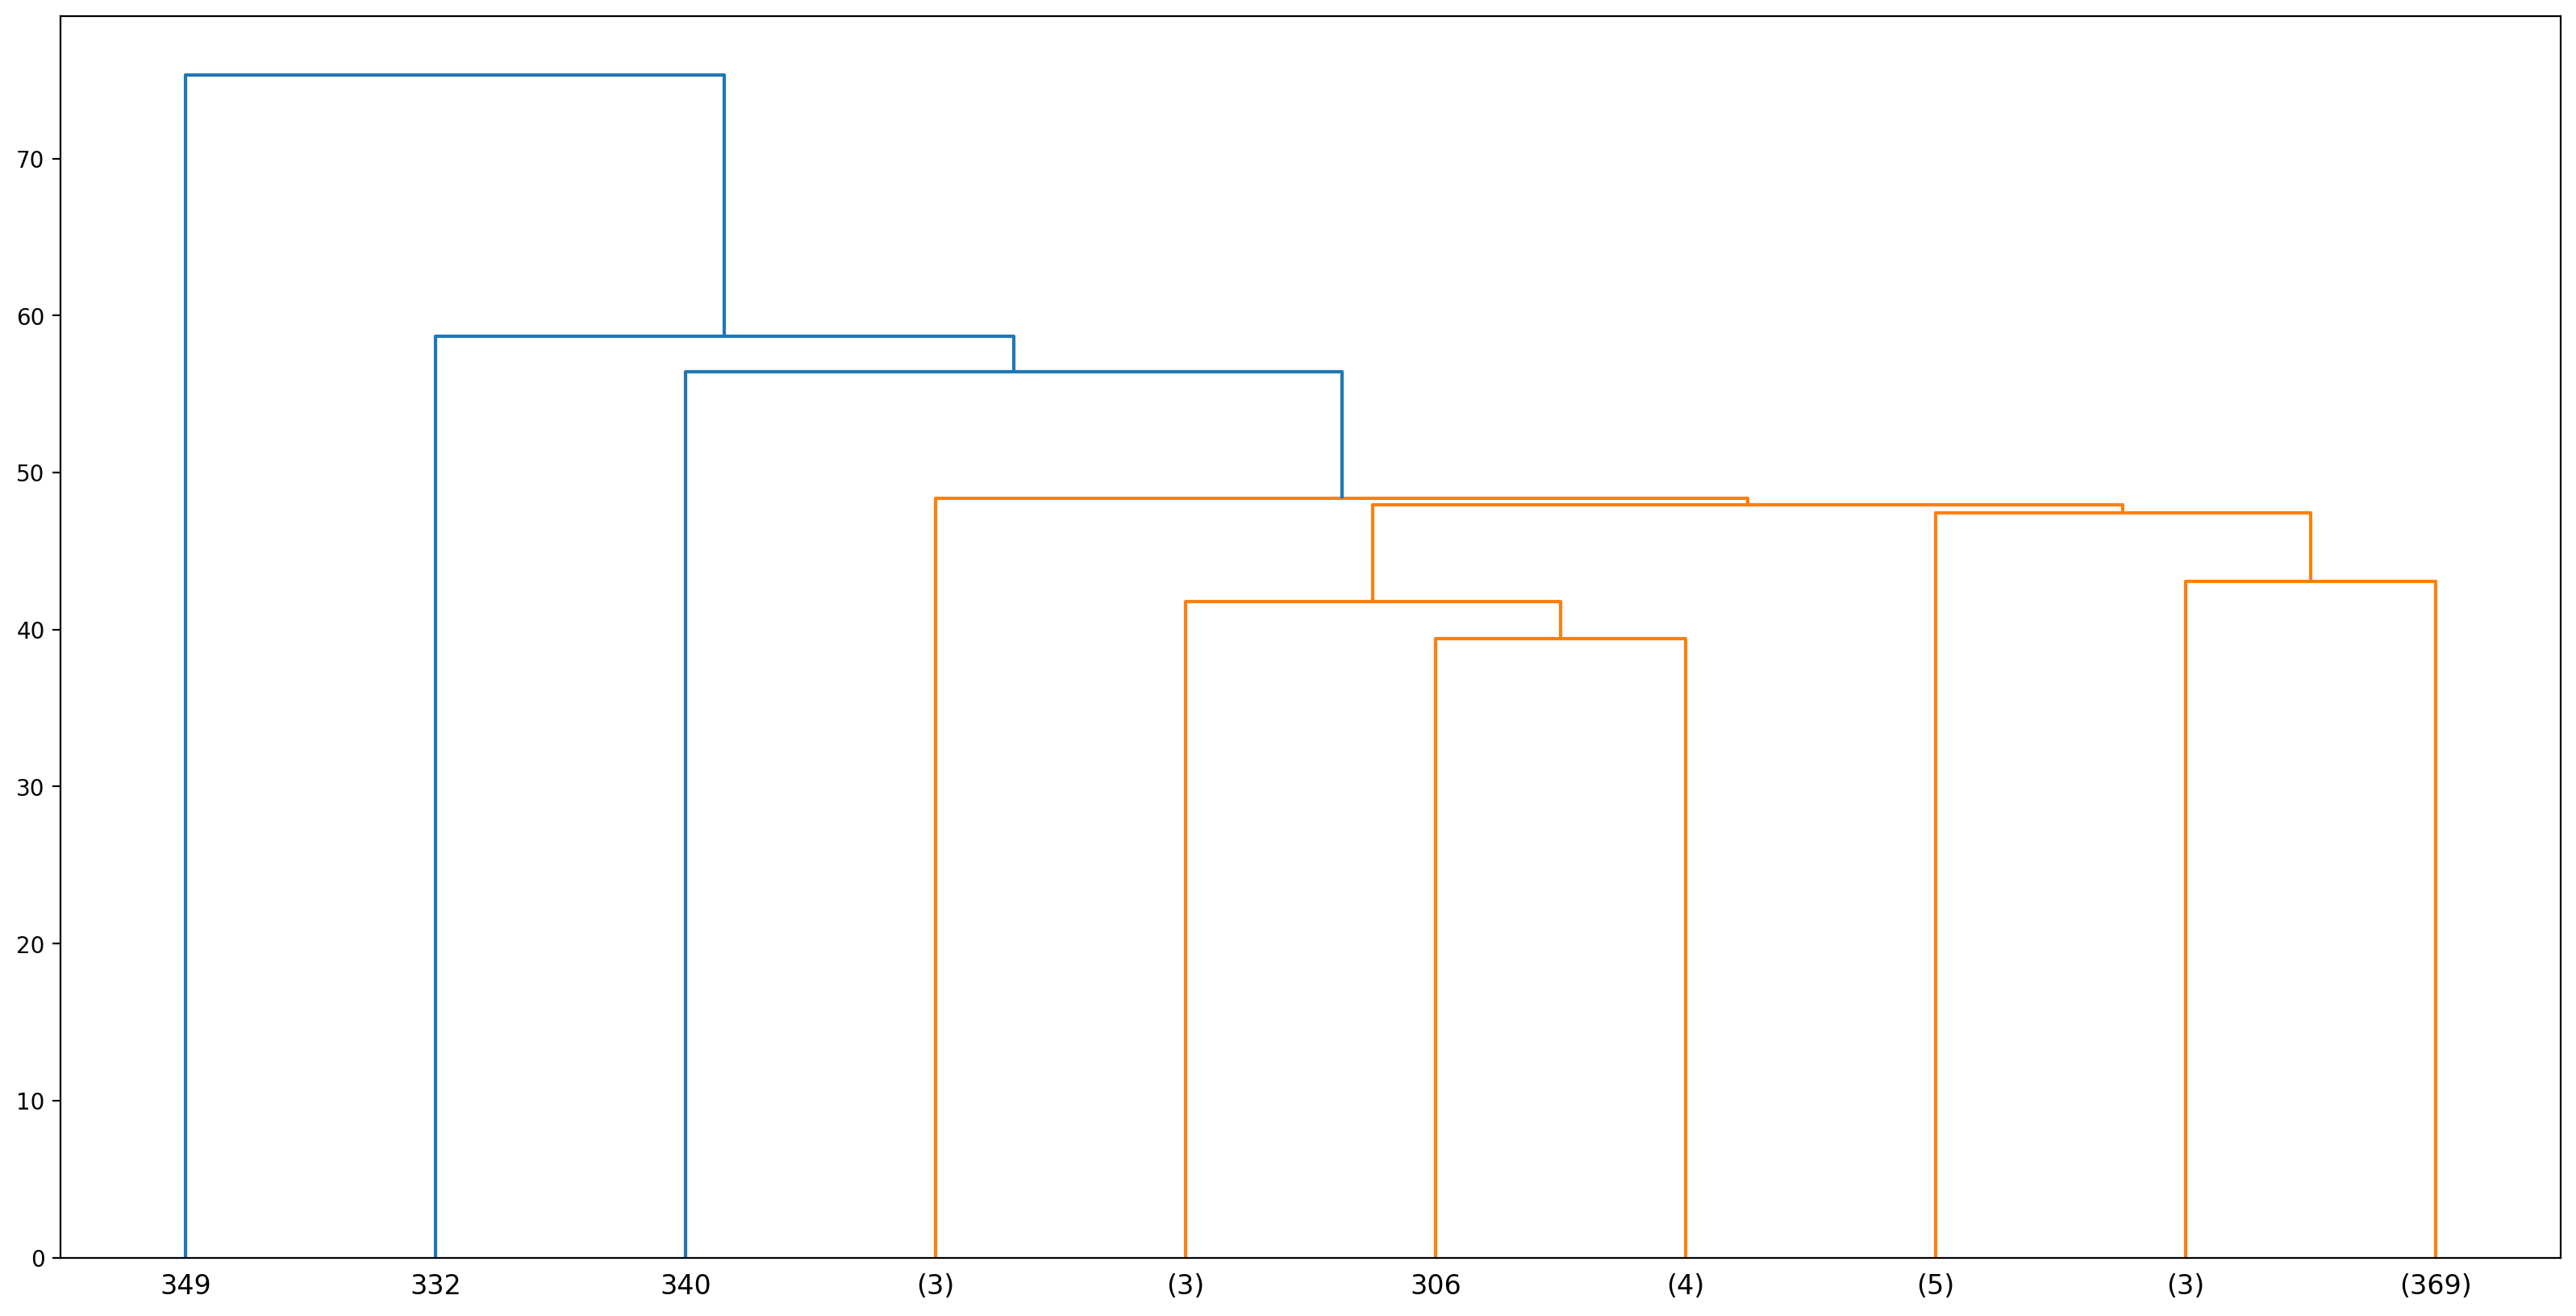

In [40]:
plt.figure(figsize=(20, 10), dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=10)

Мы объеденили 10 кластеров и остановились. В нашем случае (где 0) мы получили усеченный график. 

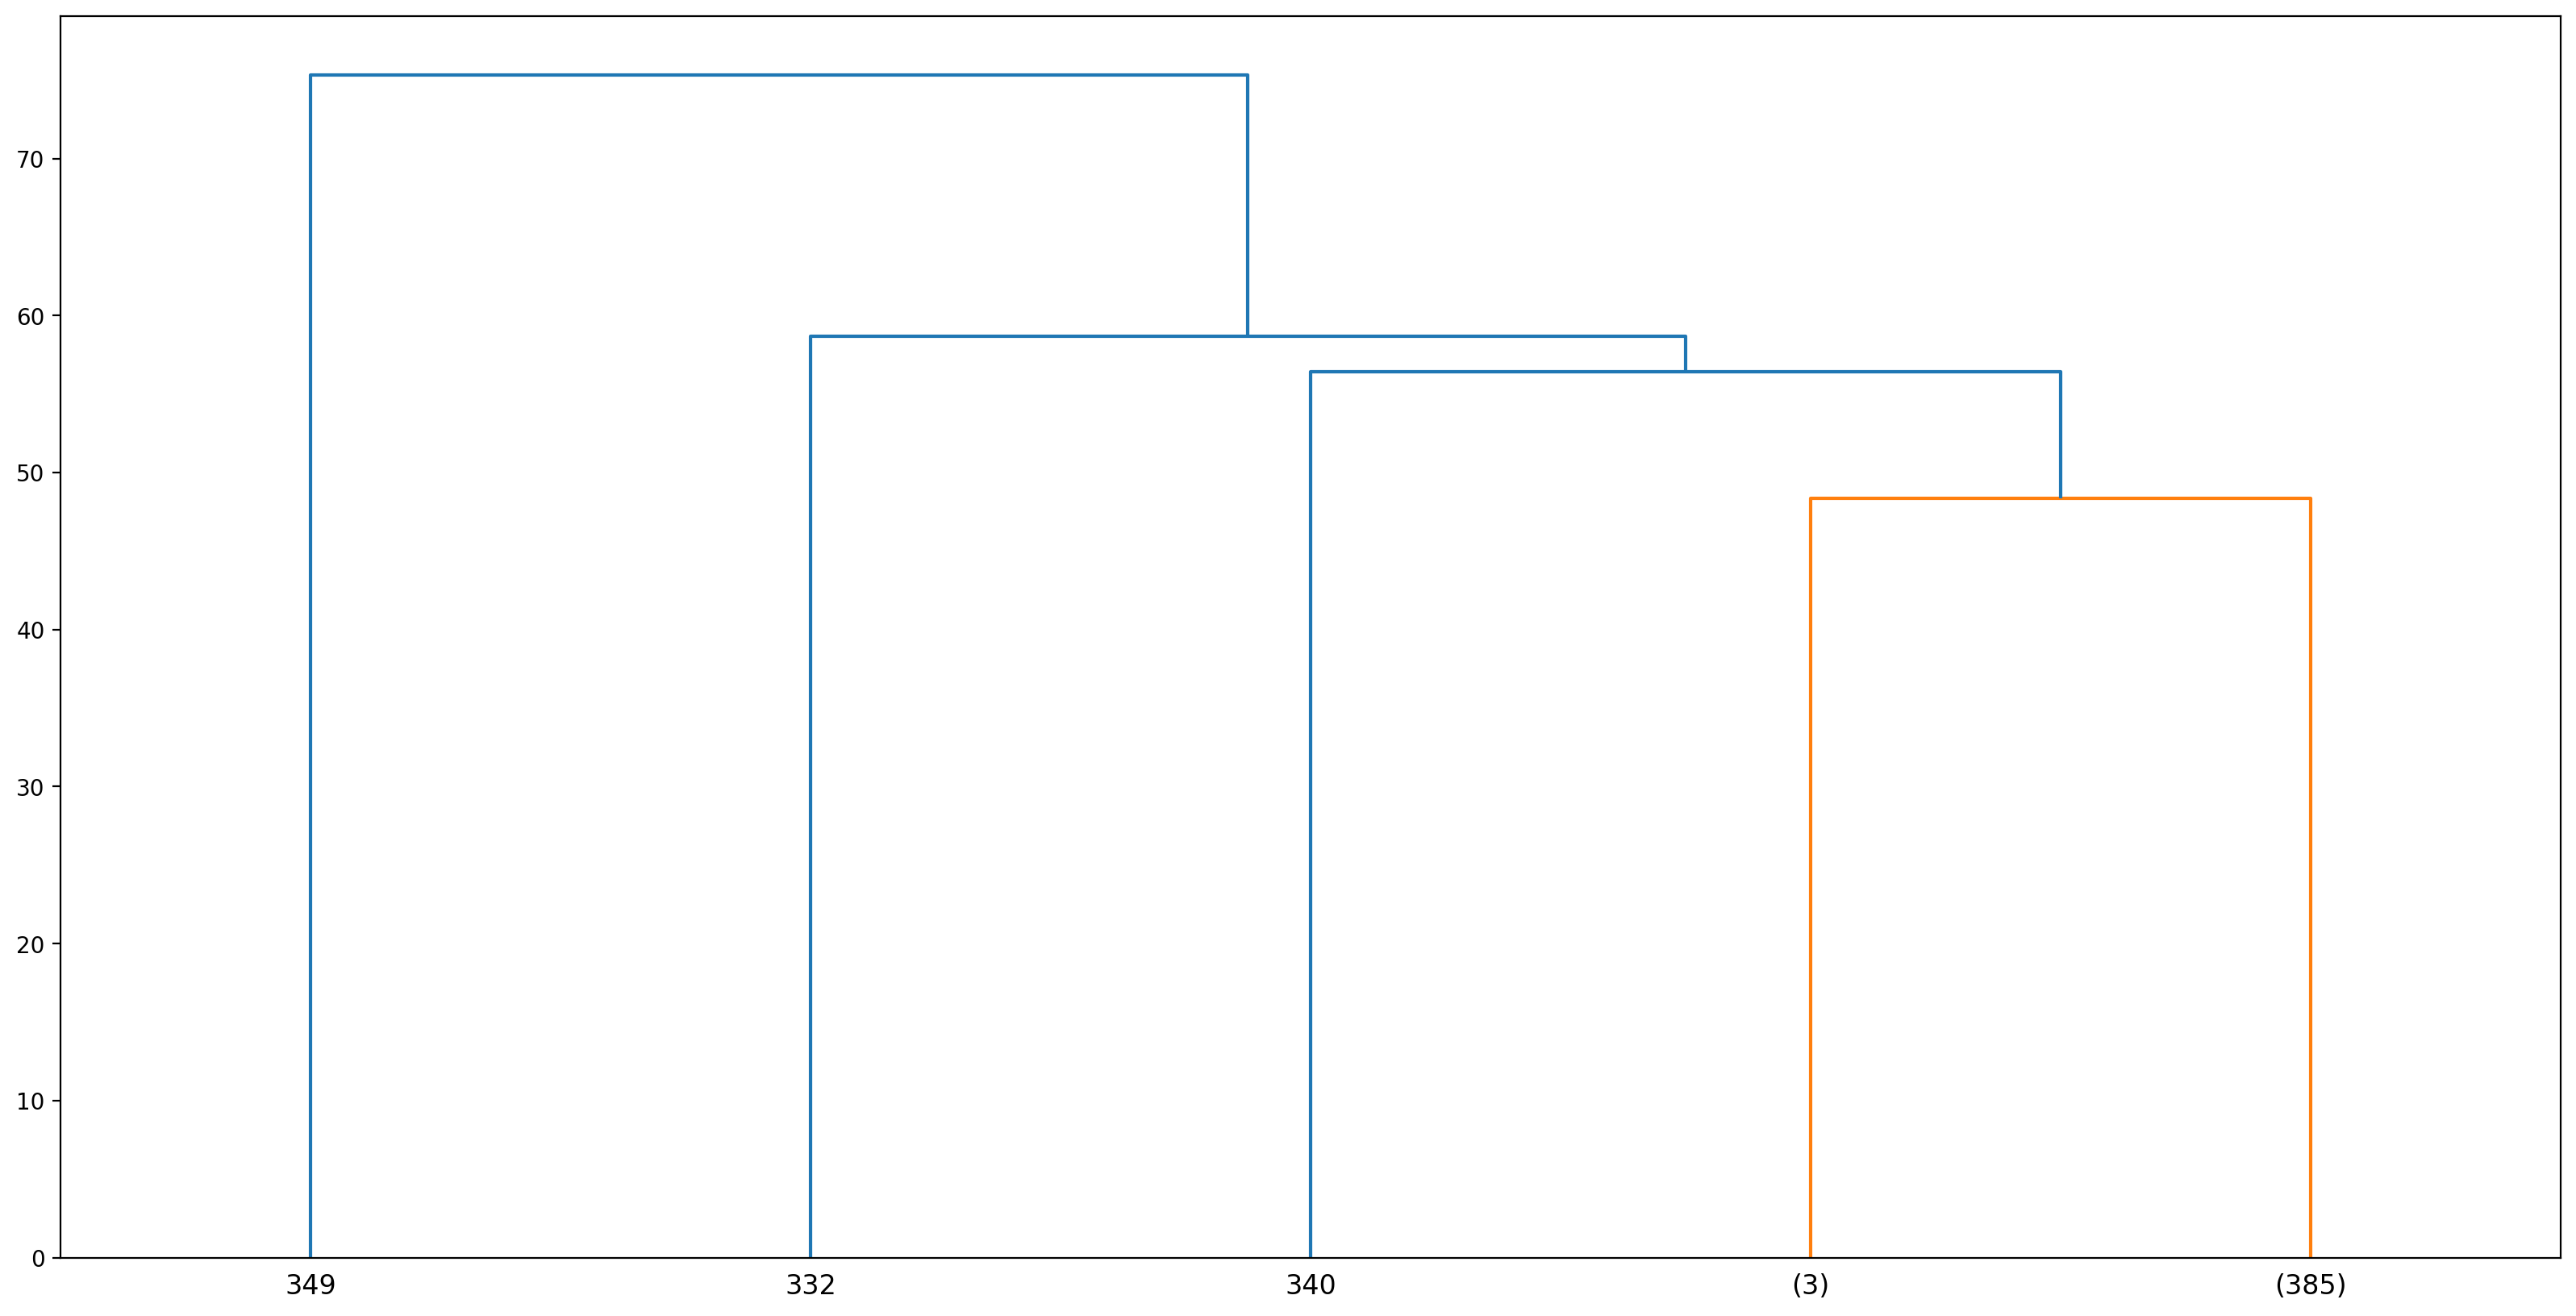

In [41]:
plt.figure(figsize=(20, 10), dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='level', p=3)

Мы получили 3 уровня и остановились. В 3-х уровнях у нас 5 кластеров.

Вычислим максимально возможное расстояние по Евклидовой метрике. Помним, что у нас масштабированные признаки от 0 до 1. 

In [42]:
np.sqrt(len(scaled_df.columns))

np.float64(3.1622776601683795)

Посмотрим на максимальное значение 

In [43]:
scaled_df['mpg'].max()

np.float64(1.0000000000000002)

Найдем позицию максимального значения

In [44]:
scaled_df['mpg'].idxmax()

320

Мы видим, что автомобиль с индексом 320 имеет максимальное значение = 1 в колонке mpg (miles_per_gallon)

Посмотрим на минимальные значения

In [45]:
scaled_df['mpg'].min()

np.float64(0.0)

In [46]:
scaled_df['mpg'].idxmin()

28

In [47]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

ВычислимЕвклидово расстояние между этими автомобилями

In [48]:
distance = np.linalg.norm(car_a - car_b)
distance

np.float64(2.3852929970374714)

Максимально возможное расстояние = 3,16 и оно не достигнуто (и не обязательно должно достигнуть). 

Посмотрим другие варианты

In [49]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)
cluster_labels = model.fit_predict(scaled_df)

In [50]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

При distance_threshold=2 мы получили 11 кластеров

In [51]:
linkage_matrix = hierarchy.linkage(model.children_)

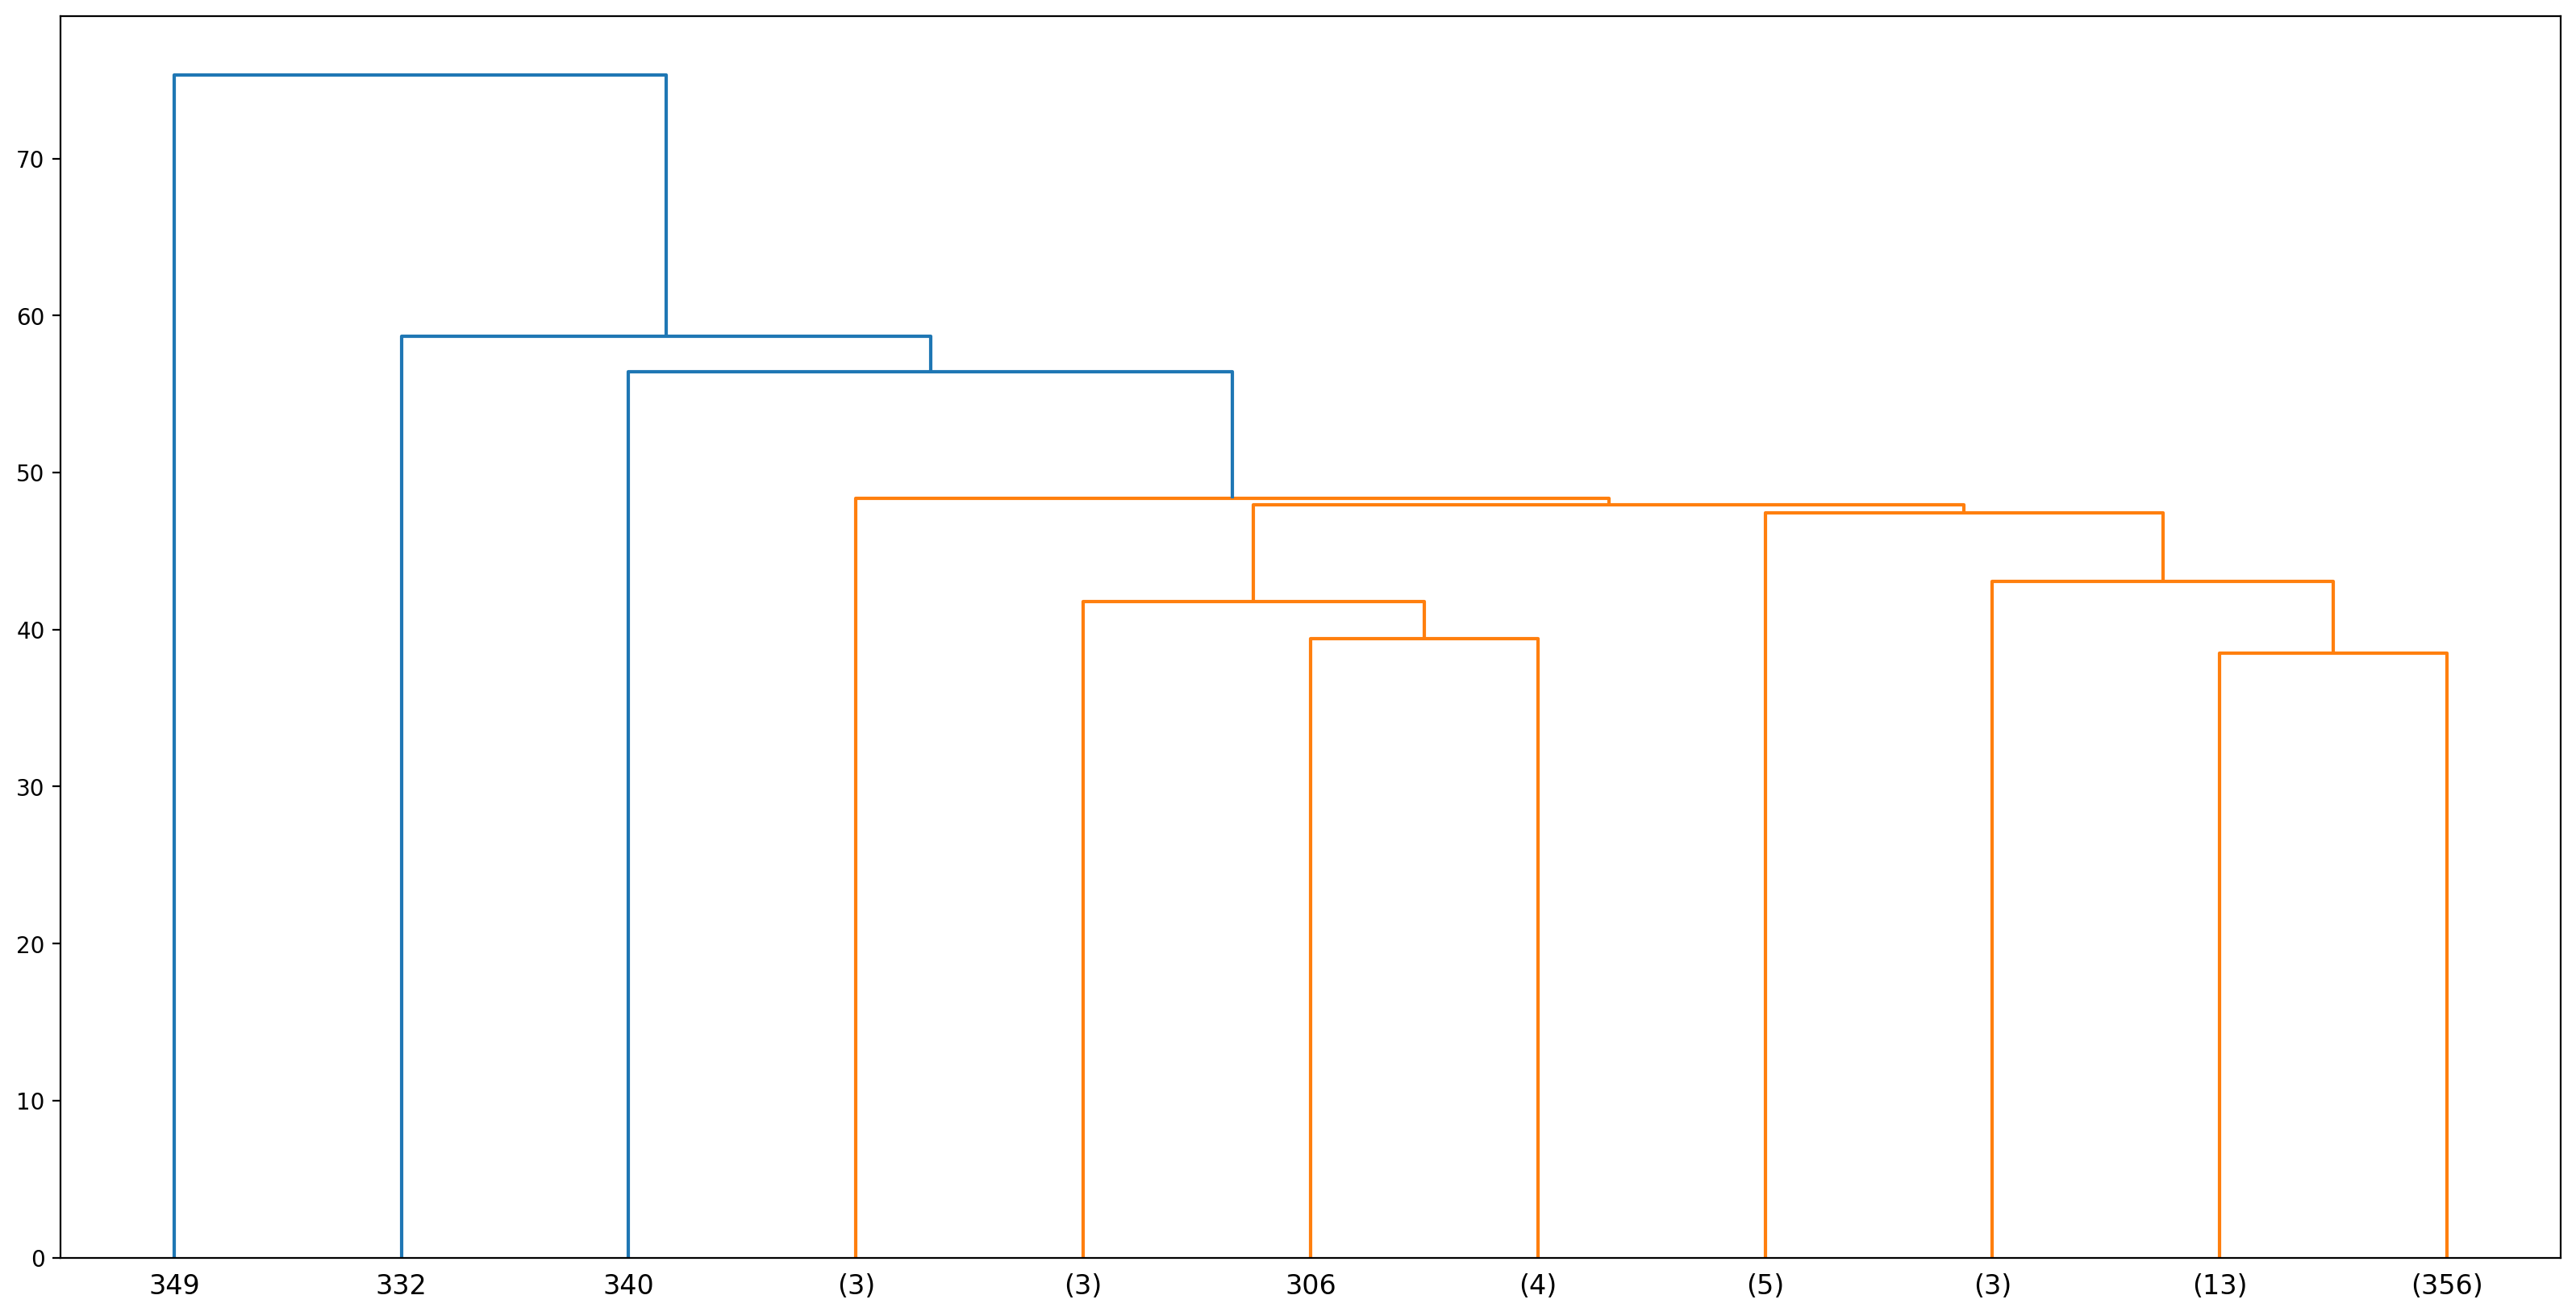

In [52]:
plt.figure(figsize=(20, 10), dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=11)